In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
def seas_std_reg(ds,reg):
    ds_reg=ds.groupby('time.season').std().\
           sel(lat=slice(reg[0],reg[1]),
               lon=slice(reg[2],reg[3]))
    return ds_reg

In [3]:
def plot_seas(da,clevs,cmap,figname,stitle,units):
    
    fg = da.plot.contourf(levels=clevs,
                          figsize=(11,8.5),
                          row='season',
                          col_wrap=2,
                          robust=True,
                          cmap=cmap,
                          extend='both',
                          subplot_kws={"projection": ccrs.PlateCarree()},
                          cbar_kwargs={"orientation": "horizontal",
                                       "shrink": 0.8,
                                       "aspect": 40,
                                       "label": units},
                         )

    for ax in fg.axes.flat:
        ax.coastlines()
        ax.add_feature(cfeature.STATES)    

    plt.suptitle(stitle)
    plt.savefig(figname)

In [4]:
path='/shared/obs/gridded/GPCP/'
figpath='../figs/'
reg=[23,56,230,295]
cmap='gist_ncar'

## Monthly

In [5]:
fname='precip.mon.mean.nc'

In [6]:
ds_mon=xr.open_dataset(path+'monthly/'+fname)

In [7]:
ds_mon_conus=seas_std_reg(ds_mon,reg)

/homes/kpegion/.conda/envs/clim680/lib/python3.7/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
/homes/kpegion/.conda/envs/clim680/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


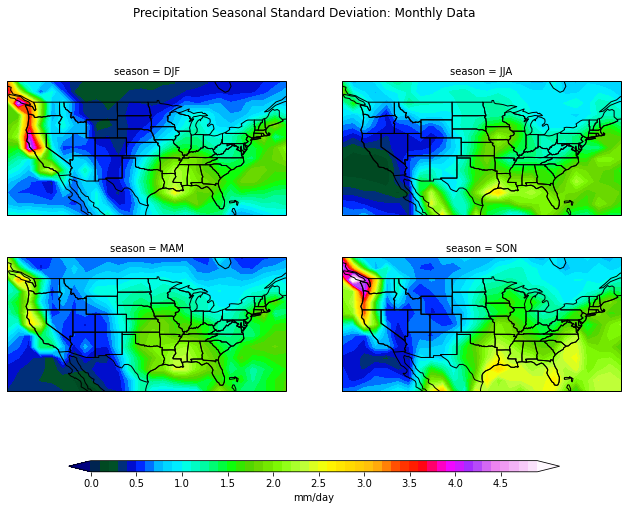

In [8]:
clevs=np.arange(0,5,0.1)
figname=figpath+'std_mon_seas_total.png'
stitle='Precipitation Seasonal Standard Deviation: Monthly Data'
units='mm/day'
plot_seas(ds_mon_conus['precip'],clevs,cmap,figname,stitle,units)

## Daily

In [9]:
fnames=path+'daily/*'

In [10]:
ds_day=xr.open_mfdataset(fnames,combine='nested',
                         concat_dim=['time'])
ds_day

<xarray.Dataset>
Dimensions:         (bnds: 2, latitude: 180, longitude: 360, time: 8647)
Coordinates:
  * longitude       (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude        (latitude) float32 -90.0 -89.0 -88.0 ... 87.0 88.0 89.0
  * time            (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2020-05-31
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (time, longitude, bnds) float32 dask.array<chunksize=(92, 360, 2), meta=np.ndarray>
    latitude_bnds   (time, latitude, bnds) float32 dask.array<chunksize=(92, 180, 2), meta=np.ndarray>
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(92, 2), meta=np.ndarray>
    precip          (time, latitude, longitude) float32 dask.array<chunksize=(92, 180, 360), meta=np.ndarray>
Attributes:
    CDI:                        Climate Data Interface version 1.8.2 (http://...
    history:                    Thu Sep 17 20:06:27 2020: cdo cat /scratch/zm...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    institution:                ACADEMIC > UMD/ESSIC > Earth System Science I...
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    standard_name_vocabulary:   CF Standard Name Table (v41, 22 February 2017)
    id:                         199610/gpcp_v01r03_daily_d19961001_c20170530.nc
    naming_authority:           gov.noaa.ncdc
    date_created:               2017-05-30T16:52:42Z
    license:                    No constraints on data access or use.
    summary:                    Global Precipitation Climatology Project (GPC...
    keywords:                   EARTH SCIENCE > ATMOSPHERE > PRECIPITATION > ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ea...
    cdm_data_type:              Grid
    project:                    GPCP > Global Precipitation Climatology Project
    processing_level:           NASA Level 3
    creator_name:               Dr. Jian-Jian Wang
    creator_email:              jjwang@umd.edu
    publisher_name:             NOAA National Centers for Environmental Infor...
    publisher_email:            jjwang@umd.edu
    publisher_url:              https://www.ncei.noaa.gov
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  1 degree
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  1 degree
    time_coverage_start:        1996-10-01T00:00:00Z
    time_coverage_end:          1996-10-01T23:59:59Z
    time_coverage_duration:     P1D
    contributor_name:           Robert Adler, Jian-Jian Wang
    contributor_role:           principalInvestigator, processor and custodian
    acknowledgment:             This project was supported in part by a grant...
    cdr_program:                NOAA Climate Data Record Program for satellit...
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu
    CDO:                        Climate Data Operators version 1.8.2 (http://...

In [11]:
ds_day=ds_day.rename({'longitude':'lon','latitude':'lat'})

In [12]:
ds_day_conus=seas_std_reg(ds_day,reg)

/homes/kpegion/.conda/envs/clim680/lib/python3.7/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
/homes/kpegion/.conda/envs/clim680/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


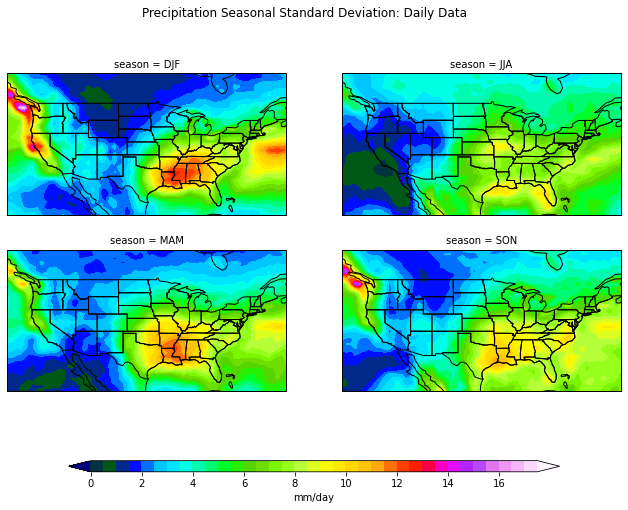

In [13]:
clevs=np.arange(0,18,0.5)
figname=figpath+'std_day_seas_total.png'
stitle='Precipitation Seasonal Standard Deviation: Daily Data'
units='mm/day'
plot_seas(ds_day_conus['precip'],clevs,cmap,figname,stitle,units)